<a href="https://colab.research.google.com/github/Ibrahim-AbuShara/EDA-practice-For-ML1/blob/main/spaceship_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spaceship Titanic
* Predict which passengers are transported to an alternate dimension

## Setup the Dependencies for Kaggle

In [9]:
!pip install kaggle

In [10]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [12]:
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 86.6MB/s]


In [14]:
!unzip spaceship-titanic.zip

Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Import important libs

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read data

In [66]:
df=pd.read_csv("train.csv")

In [17]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Uniqueness Check

In [19]:
len(df.PassengerId.unique())

8693

## HomePlanet  analysis  
##### The planet the passenger departed from, typically their planet of permanent residence.
- 201 Messing values
- 3 cats

In [20]:
df.HomePlanet

0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
8688    Europa
8689     Earth
8690     Earth
8691    Europa
8692    Europa
Name: HomePlanet, Length: 8693, dtype: object

### Messing values

In [21]:
df.HomePlanet.isna().sum()

201

In [22]:
df.HomePlanet.isna().sum()/len(df)*100

2.312205222592891

### var descrption

In [23]:
df.HomePlanet.describe()

count      8492
unique        3
top       Earth
freq       4602
Name: HomePlanet, dtype: object

In [24]:
df.HomePlanet.mode()

0    Earth
Name: HomePlanet, dtype: object

<Axes: title={'center': 'dist'}, xlabel='HomePlanet', ylabel='count'>

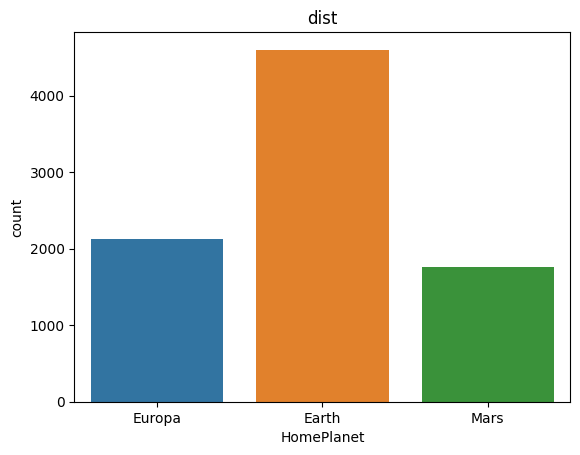

In [25]:
plt.title("dist")
sns.countplot(x=df.HomePlanet,data=df)

## CryoSleep analysis
#### Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Binary
* 217 missng values





In [26]:
df.CryoSleep

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689     True
8690    False
8691    False
8692    False
Name: CryoSleep, Length: 8693, dtype: object

### Messing values check

In [27]:
df.CryoSleep.isna().sum()


217

In [28]:
df.CryoSleep.isna().sum()/len(df)*100


2.4962613597147127

### var discerption

In [29]:
df.CryoSleep.describe()

count      8476
unique        2
top       False
freq       5439
Name: CryoSleep, dtype: object

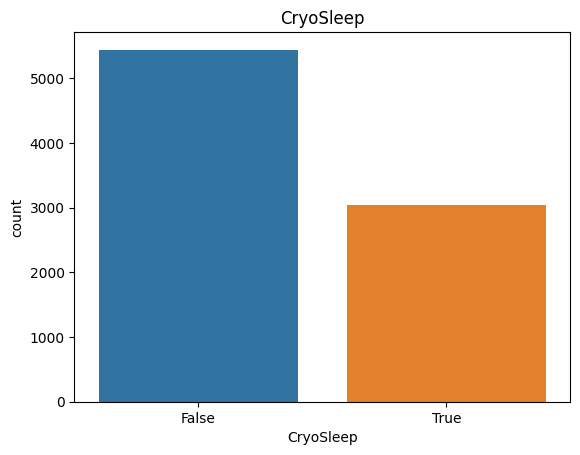

In [30]:
plt.title("CryoSleep")
sns.countplot(x=df.CryoSleep,data=df)
plt.show()

## Cabin analysis
#### The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* cobnation of catgoris deck/num/side need to split int spreted cols
- 199 null values


In [31]:
df.Cabin

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

### messing values

In [32]:
df.Cabin.isnull().sum()

199

In [33]:
df.Cabin.isnull().sum()

199

## Destination analysis
####  The planet the passenger will be debarking to.
- 3 cats

In [34]:
df.Destination

0         TRAPPIST-1e
1         TRAPPIST-1e
2         TRAPPIST-1e
3         TRAPPIST-1e
4         TRAPPIST-1e
            ...      
8688      55 Cancri e
8689    PSO J318.5-22
8690      TRAPPIST-1e
8691      55 Cancri e
8692      TRAPPIST-1e
Name: Destination, Length: 8693, dtype: object

### Messing valuse

In [35]:
df.Destination.isnull().sum()/len(df)*100

2.093638559760727

### Descrption

In [36]:
df.Destination.describe()

count            8511
unique              3
top       TRAPPIST-1e
freq             5915
Name: Destination, dtype: object

In [37]:
df.Destination.mode()

0    TRAPPIST-1e
Name: Destination, dtype: object

<Axes: title={'center': 'Destination'}, xlabel='Destination', ylabel='count'>

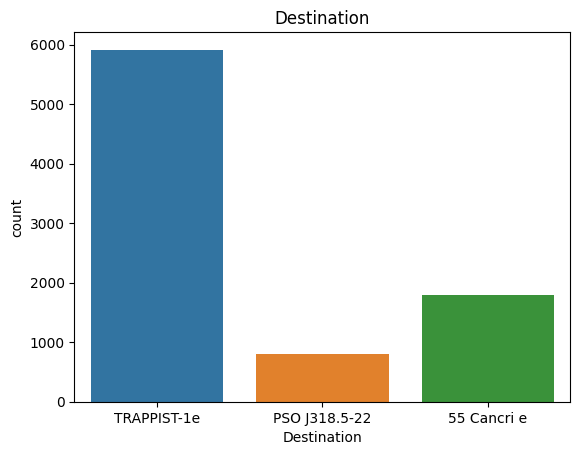

In [38]:
plt.title("Destination")
sns.countplot(x=df.Destination,data=df)

##Age Analysis
####  The age of the passenger.
- Numric

In [39]:
df.Age

0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8688    41.0
8689    18.0
8690    26.0
8691    32.0
8692    44.0
Name: Age, Length: 8693, dtype: float64

### Messing values

In [40]:
df.Age.isna().sum()/len(df)*100

2.0591280340503855

### Descrption

In [41]:
df.Age.describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

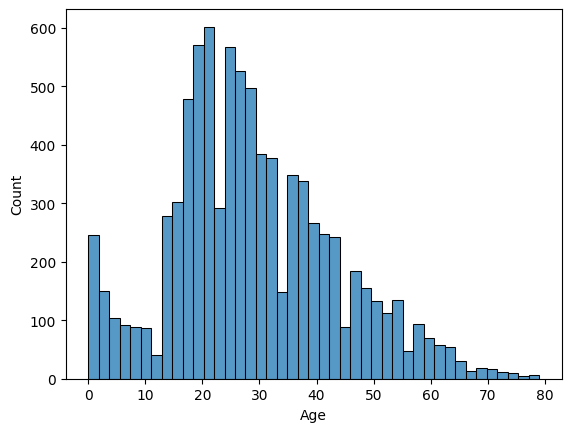

In [42]:
sns.histplot(x=df.Age,data=df)

## VIP Analysis
##### Whether the passenger has paid for special VIP service during the voyage.
- Binary




In [43]:
df.VIP

0       False
1       False
2        True
3       False
4       False
        ...  
8688     True
8689    False
8690    False
8691    False
8692    False
Name: VIP, Length: 8693, dtype: object

### missing values

In [44]:
df.VIP.isnull().sum()/len(df)*100

2.3352122397331185

### Descrption

In [45]:
df.VIP.describe()

count      8490
unique        2
top       False
freq       8291
Name: VIP, dtype: object

<Axes: xlabel='VIP', ylabel='count'>

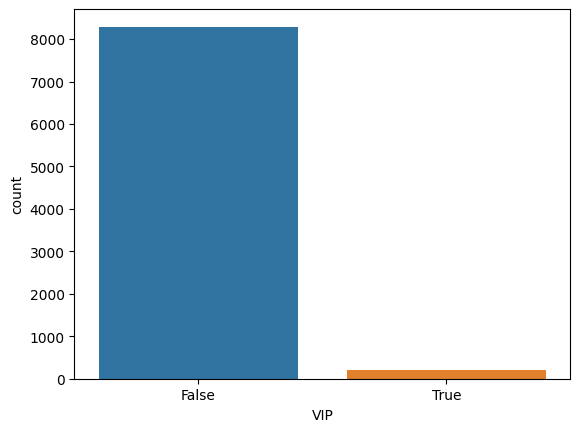

In [46]:
sns.countplot(x=df.VIP,data=df)

## RoomService	FoodCourt	ShoppingMall Spa	VRDeck
#### Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

* all of them are numeric

In [47]:
nums=df.iloc[:,7:-2]
nums

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...
8688,0.0,6819.0,0.0,1643.0,74.0
8689,0.0,0.0,0.0,0.0,0.0
8690,0.0,0.0,1872.0,1.0,0.0
8691,0.0,1049.0,0.0,353.0,3235.0


In [48]:
nums.isna().sum()

RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

In [49]:
nums.describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,224.687617,458.077203,173.729169,311.138778,304.854791
std,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,76.000000,27.000000,59.000000,46.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [50]:
nums.median()


RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

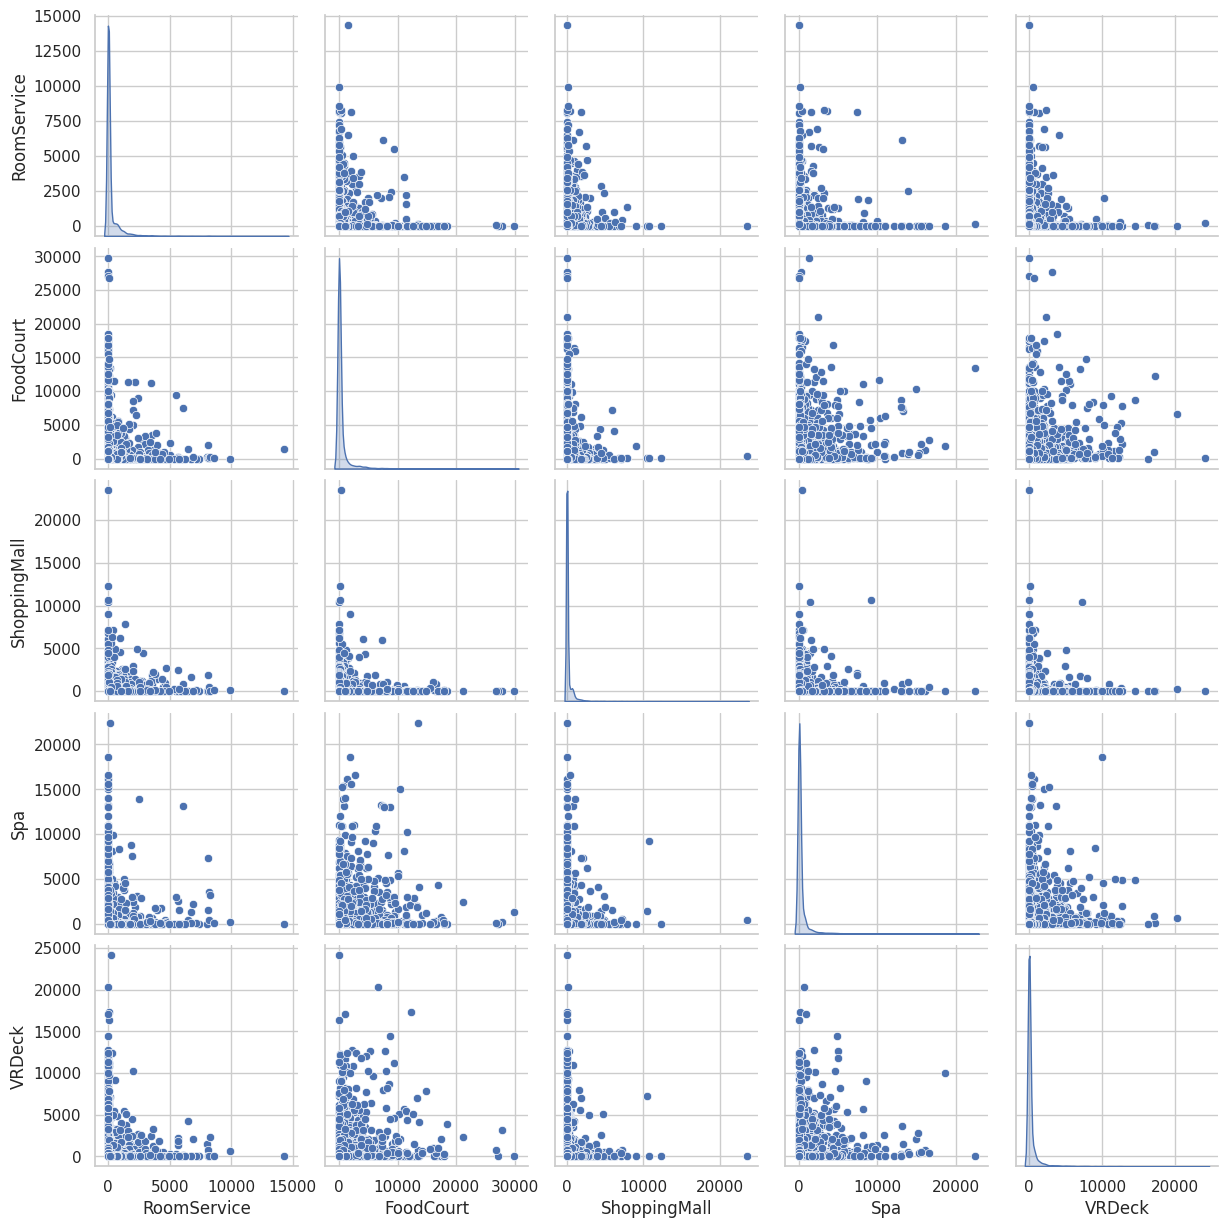

In [51]:
sns.set(style="whitegrid")
sns.set_context("notebook")

# Use pairplot to create a matrix of distplots
sns.pairplot(nums, diag_kind="kde")

# Show the plot
plt.show()

## Preprocessing

In [52]:
def split_Cabin(st):
  st=str(st)
  if st==np.nan or len(st.split("/"))<3:
    return ['Missing', 'Missing', "Missing"]
  else:
    return st.split("/")

In [67]:
def preprocessing(df):
  # Fill missing values in homeplanet with missing
  df['HomePlanet'].fillna('Missing', inplace=True)
  # Cryosleep - highly correlated - drop na rows
  df['CryoSleep'].fillna(df['CryoSleep'].mode(), inplace=True)
  #split Cabin colum to 3 cloumns
  df["Cabin"]=df["Cabin"].apply(split_Cabin)
  df[["deck", "num", "side"]] = pd.DataFrame(df['Cabin'].tolist(), index=df.index)
  df['num'] = pd.to_numeric(df['num'], errors='coerce')
  df.drop(columns=["Cabin"], inplace=True)
  #Destination
  df['Destination'].fillna(df["Destination"].mode(), inplace=True)
  #age
  df["Age"].fillna(df["Age"].mean(),inplace=True)
  #vip
  df["VIP"].fillna(df["VIP"].mode(),inplace=True)
  df.drop('Name', axis=1, inplace=True)
  # RoomService FoodCourt ShoppingMall Spa VRDeck
  df['RoomService'].fillna(0, inplace=True)
  df['FoodCourt'].fillna(0, inplace=True)
  df['ShoppingMall'].fillna(0, inplace=True)
  df['Spa'].fillna(0, inplace=True)
  df['VRDeck'].fillna(0, inplace=True)
  df.dropna(inplace=True)

  return df



## Apply preprossing

In [68]:
df_pr=preprocessing(df)
df_pr.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
deck            0
num             0
side            0
dtype: int64

## Modelling
- Feature and Target values - X, y
- One hot encode any categorical features
- Train, holdout split
- Train on RF

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns

In [70]:
# Create feature columns
# Drop identifier column
X = df_pr.drop(['Transported', 'PassengerId'], axis=1)
# One hot encode
X = pd.get_dummies(X)
# Create target columns
y = df_pr['Transported']


In [71]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

## Setup ML Pipelines

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [73]:
pipelines = {
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1234)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1234))
}

In [74]:
grid = {
    'rf': {
        'randomforestclassifier__n_estimators':[100,200,300]
    },
    'gb':{
        'gradientboostingclassifier__n_estimators':[100,200,300]
    }
}

In [75]:
pipelines.items()

dict_items([('rf', Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=1234))])), ('gb', Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=1234))]))])

In [76]:
# Create a blank dictionary to hold the models
fit_models = {}
# Loop through all the algos
for algo, pipeline in pipelines.items():
  print(f'Training the {algo} model.')
  # Create new Grid Search CV Cclass
  model = GridSearchCV(pipeline, grid[algo], n_jobs=-1, cv=10, error_score='raise')
  # Train the model
  model.fit(X_train, y_train)
  # Store results inside of the dictionary
  fit_models[algo] = model

Training the rf model.
Training the gb model.


# Evaluate Performance on Test Partition
- Grab the testing data from the test.csv and evalute on that


In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [78]:
# Evaluate the performance of the model
for algo, model in fit_models.items():
  yhat = model.predict(X_test)
  accuracy = accuracy_score(y_test, yhat)
  precision = precision_score(y_test, yhat)
  recall = recall_score(y_test, yhat)
  print(f'Metrics for {algo}: accuracy- {accuracy}, recall- {recall}, precision- {precision}')

Metrics for rf: accuracy- 0.8119478334034498, recall- 0.7806122448979592, precision- 0.8292682926829268
Metrics for gb: accuracy- 0.8018510727808161, recall- 0.8248299319727891, precision- 0.7854251012145749


## Save the model

In [79]:
import pickle

In [80]:
with open('gradientboosted.pkl', 'wb') as f:
  pickle.dump(fit_models['gb'], f)


with open('gradientboosted.pkl', 'rb') as f:
  reloaded_model = pickle.load(f)


## Predict on Test Data

In [81]:
# Read in the Test CSV Dataset
test_df = pd.read_csv('test.csv')
# Deep copy
abt_test = test_df.copy()
# Run through the preocessing pipeline
abt_test=preprocessing(abt_test)
# One hot encode categorical variables
abt_test = pd.get_dummies(abt_test.drop('PassengerId', axis=1))

In [82]:
abt_test.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'num', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'HomePlanet_Missing', 'CryoSleep_False', 'CryoSleep_True',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True', 'deck_A', 'deck_B',
       'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_T', 'side_P',
       'side_S'],
      dtype='object')

In [86]:
yhat_test = fit_models['rf'].predict(abt_test)
submission = pd.DataFrame([test_df['PassengerId'], yhat_test]).T
submission.columns = ['PassengerID', 'Transported']
submission.head()

,PassengerID,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


## Submit to Kaggle

In [87]:
submission.to_csv('kaggle_submission.csv', index=False)

In [88]:
!kaggle competitions submit -c spaceship-titanic -m "initial gb model" -f "kaggle_submission.csv"

100% 55.0k/55.0k [00:02<00:00, 23.8kB/s]
Successfully submitted to Spaceship Titanic